In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (20, 10)

In [13]:
if os.path.isfile("final_data76.xlsx"):
    filepath = "final_data76.xlsx"

frame_final = pd.read_excel(filepath)
print("done")

done


In [14]:
frame_final.head()

,Frame,Time (s),Flow (veh/h),Density (veh/km),Spacing (m),Headway (s),Space mean speed (km/hr),AV distance travelled (m),AV heading (deg),AV speed (km/hr),Number of cars detected,Cars detected
0,2,0.1,1073.623517,24.253645,41.230915,3.353131,44.266480,1.438222,0.000000,51.775989,3,"[-58.87428119661371, -22.83472725853504, 64.81..."
1,3,0.2,1073.123728,24.240443,41.253372,3.354692,44.269972,2.862073,0.369120,51.258649,3,"[-59.12198453922262, -23.177744308798808, 64.6..."
2,4,0.3,1079.752162,24.244875,41.245831,3.334098,44.535275,4.311595,0.340795,52.182778,3,"[-59.353941718627155, -23.397811882914468, 64...."
3,5,0.4,1079.341178,24.249076,41.238685,3.335368,44.510611,5.743670,1.975628,51.554710,3,"[-59.58399040741821, -23.61507419293281, 64.13..."
4,6,0.5,1081.451000,24.252833,41.232296,3.328861,44.590708,7.174757,0.917288,51.519113,3,"[-59.81239734021722, -23.829084381755962, 63.8..."


In [15]:
frame_final['Cars detected'] = frame_final['Cars detected'].map(lambda x: x.lstrip('[]').rstrip('[]'))
frame_final.head()

,Frame,Time (s),Flow (veh/h),Density (veh/km),Spacing (m),Headway (s),Space mean speed (km/hr),AV distance travelled (m),AV heading (deg),AV speed (km/hr),Number of cars detected,Cars detected
0,2,0.1,1073.623517,24.253645,41.230915,3.353131,44.266480,1.438222,0.000000,51.775989,3,"-58.87428119661371, -22.83472725853504, 64.818..."
1,3,0.2,1073.123728,24.240443,41.253372,3.354692,44.269972,2.862073,0.369120,51.258649,3,"-59.12198453922262, -23.177744308798808, 64.63..."
2,4,0.3,1079.752162,24.244875,41.245831,3.334098,44.535275,4.311595,0.340795,52.182778,3,"-59.353941718627155, -23.397811882914468, 64.3..."
3,5,0.4,1079.341178,24.249076,41.238685,3.335368,44.510611,5.743670,1.975628,51.554710,3,"-59.58399040741821, -23.61507419293281, 64.132..."
4,6,0.5,1081.451000,24.252833,41.232296,3.328861,44.590708,7.174757,0.917288,51.519113,3,"-59.81239734021722, -23.829084381755962, 63.88..."


In [16]:
frame_final.astype(str);
frame_final.head()

,Frame,Time (s),Flow (veh/h),Density (veh/km),Spacing (m),Headway (s),Space mean speed (km/hr),AV distance travelled (m),AV heading (deg),AV speed (km/hr),Number of cars detected,Cars detected
0,2,0.1,1073.623517,24.253645,41.230915,3.353131,44.266480,1.438222,0.000000,51.775989,3,"-58.87428119661371, -22.83472725853504, 64.818..."
1,3,0.2,1073.123728,24.240443,41.253372,3.354692,44.269972,2.862073,0.369120,51.258649,3,"-59.12198453922262, -23.177744308798808, 64.63..."
2,4,0.3,1079.752162,24.244875,41.245831,3.334098,44.535275,4.311595,0.340795,52.182778,3,"-59.353941718627155, -23.397811882914468, 64.3..."
3,5,0.4,1079.341178,24.249076,41.238685,3.335368,44.510611,5.743670,1.975628,51.554710,3,"-59.58399040741821, -23.61507419293281, 64.132..."
4,6,0.5,1081.451000,24.252833,41.232296,3.328861,44.590708,7.174757,0.917288,51.519113,3,"-59.81239734021722, -23.829084381755962, 63.88..."


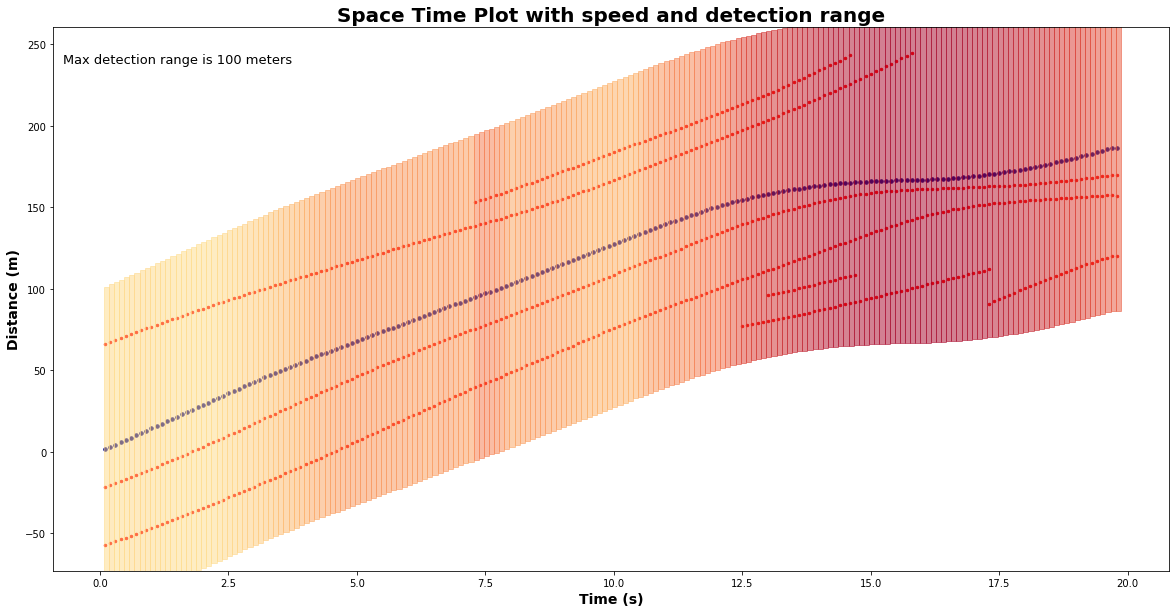

In [17]:
time_space = plt.scatter(x=frame_final['Time (s)'], y=frame_final['AV distance travelled (m)'], s=12, c="darkblue")
for j in range(len(frame_final.iloc[:,11])):
    Cars_detected = frame_final.iloc[j,11].split(", ")
    cars_pos = [float(k) + frame_final.iloc[j,7] for k in Cars_detected]
    ads = [frame_final.iloc[j,1]] * len(Cars_detected)
    time_space = plt.scatter(x=ads, y= cars_pos, s=6, c="red")
plt.xlabel("Time (s)",fontweight ='bold', size=14)
plt.ylabel("Distance (m)", fontweight ='bold',size=14)
plt.title("Space Time Plot with speed and detection range", fontweight ='bold',size=20)

for i in range(len(frame_final.iloc[:,0])):
    left, bottom, width, height = (frame_final.iloc[i,1]-0.03, frame_final.iloc[i,7] - 100, 0.1, 200)
    cmap = plt.get_cmap('RdYlGn')
    adjusted_speed = int((frame_final.iloc[i,9])**2/27)
    colors = cmap(adjusted_speed)
    rect=mpatches.Rectangle((left,bottom),width,height, alpha=0.5, color=colors)
    plt.gca().add_patch(rect)

plt.figtext(0.132, 0.83,"Max detection range is 100 meters", fontsize = 13);

frame_img = 'space_time_graph.png'
plt.savefig(frame_img)

import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    return x+y

X,Y = np.mgrid[-1:1:100j, -1:1:100j]

Z = f(X,Y)

plt.figure()
mpb = plt.pcolormesh(X,Y,Z,cmap='RdYlGn')

fig,ax = plt.subplots()
cbar = plt.colorbar(mpb,ax=ax)
cbar.set_ticks([-2, -1, 0, 1, 1.94])
cbar.set_ticklabels(["20", "40", "60", "80", "100"])
ax.remove()
plt.savefig('plot_onlycbar.png')

Text(0.5, 1.0, 'Flow Time Plot')

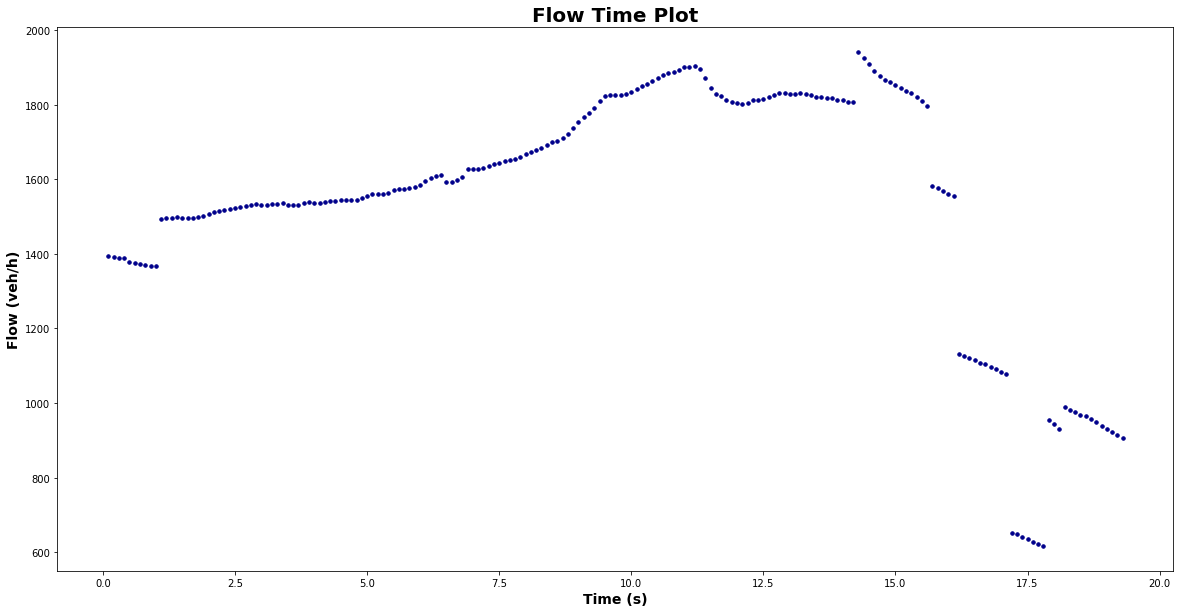

In [ ]:
time_flows = plt.scatter(x=frame_final['Time (s)'], y=frame_final['Flow (veh/h)'], s=12, c="darkblue")
plt.xlabel("Time (s)",fontweight ='bold', size=14)
plt.ylabel("Flow (veh/h)", fontweight ='bold',size=14)
plt.title("Flow Time Plot", fontweight ='bold',size=20)

Text(0.5, 1.0, 'Density Time Plot')

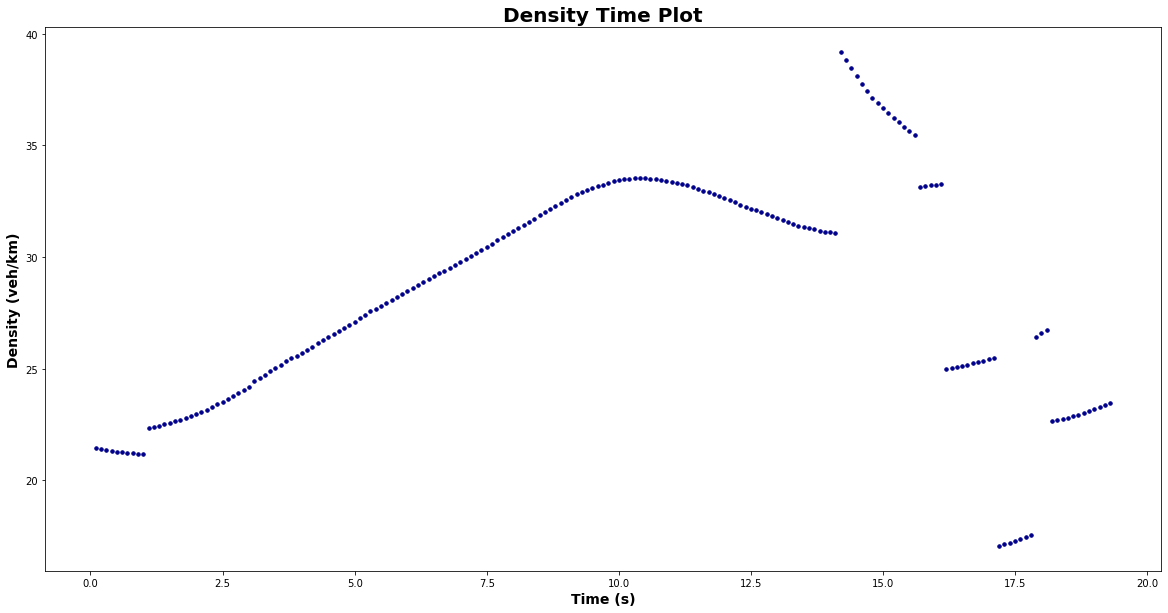

In [ ]:
time_flows = plt.scatter(x=frame_final['Time (s)'], y=frame_final['Density (veh/km)'], s=12, c="darkblue")
plt.xlabel("Time (s)",fontweight ='bold', size=14)
plt.ylabel("Density (veh/km)", fontweight ='bold',size=14)
plt.title("Density Time Plot", fontweight ='bold',size=20)

Text(0.5, 1.0, 'Speed Time Plot')

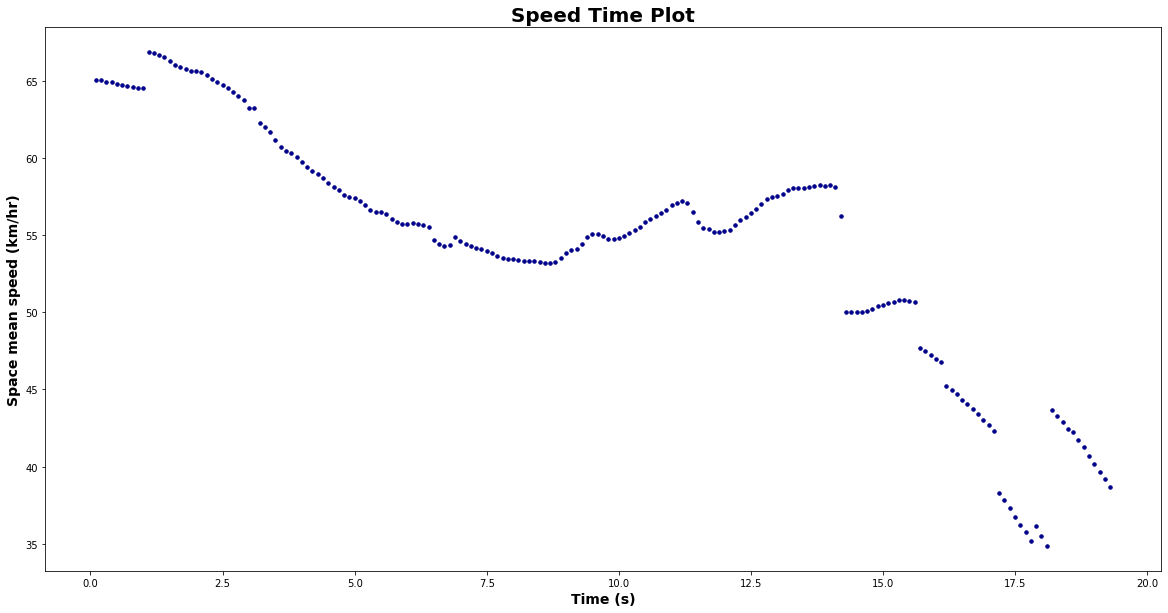

In [ ]:
time_flows = plt.scatter(x=frame_final['Time (s)'], y=frame_final['Space mean speed (km/hr)'], s=12, c="darkblue")
plt.xlabel("Time (s)",fontweight ='bold', size=14)
plt.ylabel("Space mean speed (km/hr)", fontweight ='bold',size=14)
plt.title("Speed Time Plot", fontweight ='bold',size=20)